# Node Embeddings Clustering and Profiling

In [1]:
import os
import pandas as pd

os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

from config import PATH

SEED = 42

In [2]:
emb_df = pd.read_csv(PATH + 'node_embeddings.csv')

In [3]:
n_rows = emb_df.shape[0]

embedding_cols = emb_df.columns.to_list()
embedding_cols.remove('user_id')

# Remove zeros
emb_df = emb_df.loc[~(emb_df[embedding_cols] == 0.0).all(axis=1)]
print('Removed zero embeddings:')
print(f"Nodes remaining = {emb_df.shape[0]}/{n_rows}")

Removed zero embeddings:
Nodes remaining = 324/110788


In [4]:
nodes_df = pd.read_csv(PATH + 'node_features.csv')
node_columns = nodes_df.columns.tolist()
node_columns.remove('user_id')
df = nodes_df.merge(emb_df, on="user_id", how="inner")

In [5]:
metrics_df = pd.read_csv(PATH + 'graph_metrics.csv')
metrics_df.rename(columns={"node": "user_id"}, inplace=True)
metrics_columns = metrics_df.columns.tolist()
metrics_columns.remove('Unnamed: 0')
metrics_columns.remove('user_id')  
df = df.merge(metrics_df, on="user_id", how="inner")
df.head()

,user_id,user_rt,num_post,user_time_rt,num_post_unverified,num_post_non-rumor,num_post_true,num_post_false,num_rt_unverified,num_rt_non-rumor,...,emb_9,emb_10,emb_11,Unnamed: 0,in_degree,out_degree,katz,eigenvector,pagerank,betweenness
0,104561999,2,0,4.4850,0,0,0,0,0,2,...,-0.132889,-0.349261,-0.055895,175384,2,2,0.001348,1.182070e-07,0.000001,5.625
1,106272436,2,0,5.0450,0,0,0,0,0,0,...,-0.207917,-0.472711,-0.079423,263243,2,3,0.001290,7.463297e-14,0.000003,20.000
2,107663008,10,0,1945.9070,0,0,0,0,5,5,...,-0.273878,-1.118356,-0.526611,28487,7,3,0.002042,1.312826e-05,0.000001,9642.000
3,1077446982,0,1,0.0000,0,0,0,1,0,0,...,-0.010486,-0.033332,-0.009099,87094,0,162,0.001046,5.739963e-22,0.000001,0.000
4,110496588,4,0,31.6875,0,0,0,0,4,0,...,-0.274140,-1.105921,-0.523582,433414,4,5,0.001685,1.258059e-05,0.000004,7251.000


In [6]:
df[node_columns].describe()

,user_rt,num_post,user_time_rt,num_post_unverified,num_post_non-rumor,num_post_true,num_post_false,num_rt_unverified,num_rt_non-rumor,num_rt_true,num_rt_false,score,rt_total
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,3.240000e+02,324.000000
mean,4.327160,0.925926,617.637147,0.138889,0.287037,0.293210,0.206790,1.000000,1.388889,0.901235,1.037037,8.762812e-01,424.675926
std,4.322639,4.623343,3443.685065,0.535865,2.744150,1.518865,1.083431,1.924263,2.908831,1.849474,2.122820,4.024312e+00,2425.109855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.675373e+01,0.000000
25%,2.000000,0.000000,5.129583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.192668e-10,0.000000
50%,3.000000,0.000000,52.623778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.612504e-02,0.000000
75%,5.000000,0.000000,310.082500,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.414292e+00,0.000000
max,30.000000,53.000000,49746.430000,5.000000,41.000000,16.000000,12.000000,14.000000,29.000000,14.000000,21.000000,5.007680e+01,31790.000000


In [7]:
df[metrics_columns].describe()

,in_degree,out_degree,katz,eigenvector,pagerank,betweenness
count,324.000000,324.000000,324.000000,3.240000e+02,324.000000,3.240000e+02
mean,3.783951,307.129630,0.001647,1.774980e-03,0.000002,2.510662e+06
std,3.515061,1837.311367,0.000703,1.524157e-02,0.000003,1.687274e+07
min,0.000000,1.000000,0.001046,5.739963e-22,-0.000015,0.000000e+00
25%,2.000000,1.000000,0.001295,1.446586e-12,0.000001,0.000000e+00
50%,3.000000,2.000000,0.001432,1.132228e-07,0.000001,2.229167e+01
75%,4.000000,9.000000,0.001727,2.707519e-05,0.000003,1.205050e+04
max,25.000000,24116.000000,0.008743,2.492946e-01,0.000020,2.455362e+08


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[embedding_cols])

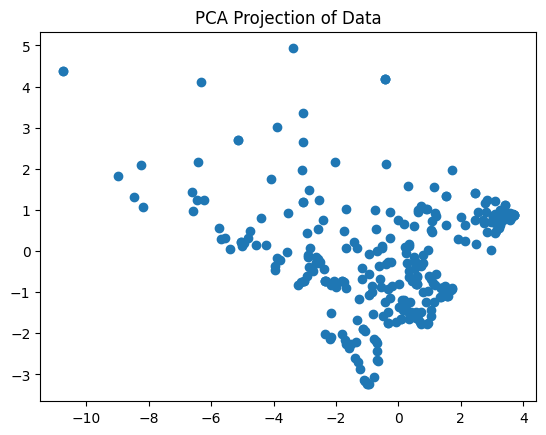

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

plt.scatter(X_2D[:, 0], X_2D[:, 1])
plt.title("PCA Projection of Data")
plt.show()

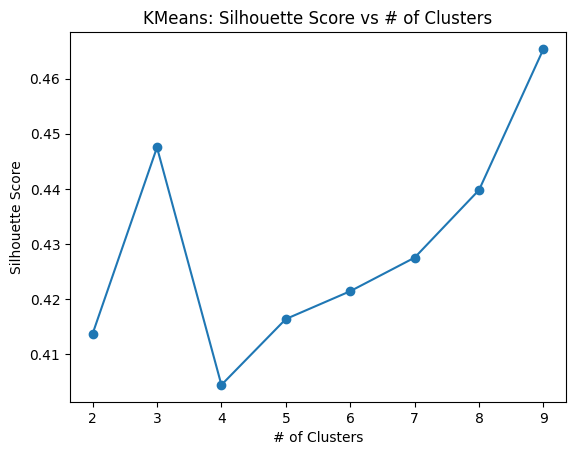

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

CLUSTER_RANGE = range(2, 10)

def plot_silhouette(X, method_name, params = {}, cluster_range = CLUSTER_RANGE):
    methods = {
        "KMeans": KMeans,
        "AgglomerativeClustering": AgglomerativeClustering
    }
    scores = []
    for k in cluster_range:
        model = methods[method_name](n_clusters=k, **params)
        model.fit(X)

        scores.append(silhouette_score(X, model.labels_))
        
    plt.plot(cluster_range, scores, marker='o')
    plt.title(f"{method_name}: Silhouette Score vs # of Clusters")
    plt.xlabel("# of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    
    return None

plot_silhouette(X, 'KMeans', {'random_state': SEED})

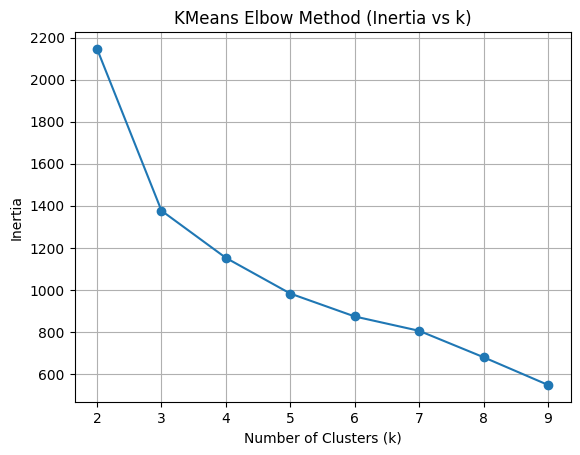

In [49]:
inertias = []
for k in CLUSTER_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_)

plt.plot(CLUSTER_RANGE, inertias, marker='o')
plt.title("KMeans Elbow Method (Inertia vs k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

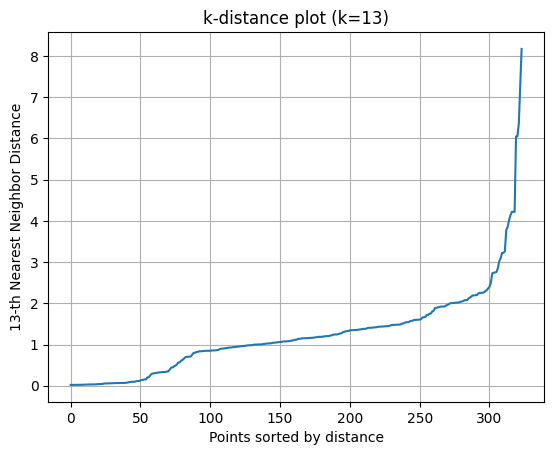

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

k = 13
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)

plt.plot(np.sort(distances[:, -1]))
plt.title(f"k-distance plot (k={k})")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.grid()
plt.show()

In [15]:
from itertools import product

def clustering_grid_search(X, method, param_grid, param_names):

    best_score = -1
    best_params = None
    all_results = []

    for param_values in param_grid:
        params = dict(zip(param_names, param_values))
        model = method(**params)
        labels = model.fit_predict(X)

        if len(set(labels)) <= 1 or (set(labels) == {-1}):
            continue

        score = silhouette_score(X, labels)
        all_results.append((params, score))

        if score > best_score:
            best_score = score
            best_params = params
            
    print(f"Best params: {best_params}")
    print(f"Best score: {best_score}")

    return best_params

db_param_grid = list(product([0.3, 0.5, 0.7, 1.0, 2.5, 2.7, 3.0, 3.3, 3.5], [10, 12, 13, 15, 20], ['euclidean', 'manhattan', 'cosine']))
db_param_names = ['eps', 'min_samples', 'metric']

best_db_params = clustering_grid_search(
    X, DBSCAN, db_param_grid, db_param_names
)

Best params: {'eps': 3.3, 'min_samples': 10, 'metric': 'euclidean'}
Best score: 0.5963760783393248


In [ ]:
agg_param_grid = list(product(['ward', 'average', 'complete'], ['euclidean']))
agg_param_names = ['linkage', 'metric']

best_agg_params = clustering_grid_search(
    X, AgglomerativeClustering, agg_param_grid, agg_param_names
)

Best params: {'linkage': 'average', 'metric': 'euclidean'}
Best score: 0.6282175859102318


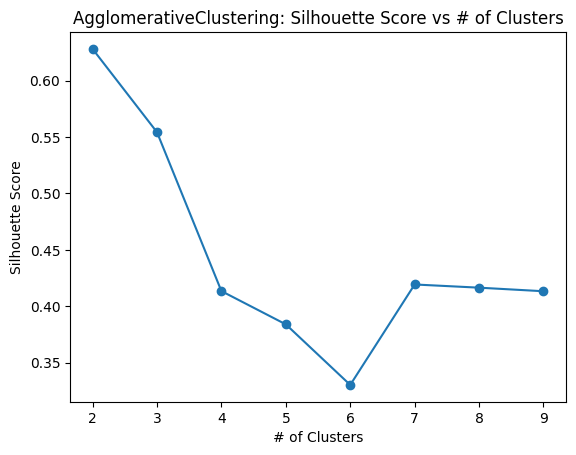

In [27]:
plot_silhouette(X, 'AgglomerativeClustering', best_agg_params)

<Axes: xlabel='cluster'>

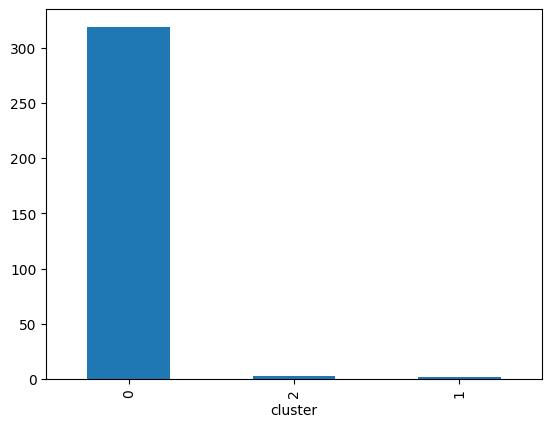

In [54]:
model = AgglomerativeClustering(n_clusters=3, **best_agg_params)
model.fit(X)
df['cluster'] = model.labels_
df['cluster'].value_counts().plot(kind='bar')

<Axes: xlabel='cluster'>

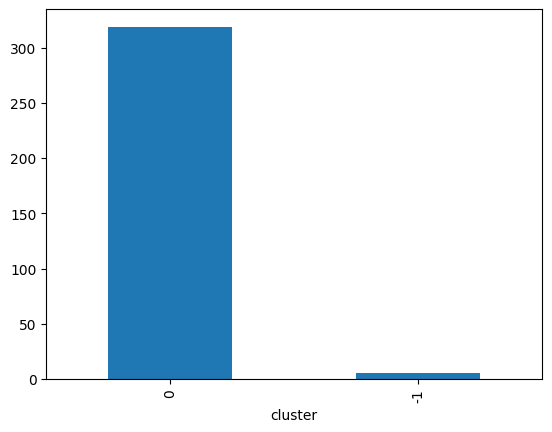

In [48]:
model = DBSCAN(**best_db_params)
model.fit(X)
df['cluster'] = model.labels_
df['cluster'].value_counts().plot(kind='bar')

<Axes: xlabel='cluster'>

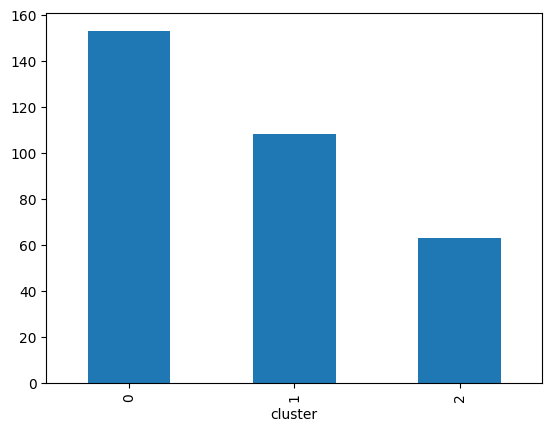

In [61]:
model = KMeans(n_clusters=3, random_state=SEED)
model.fit(X)
df['cluster'] = model.labels_
df['cluster'].value_counts().plot(kind='bar')

In [60]:
df.groupby('cluster')['betweenness'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,319.0,2.549909e+06,1.700193e+07,0.0,0.000,21.333333,12057.000,245536201.9
1,2.0,1.428625e+04,3.344262e+03,11921.5,13103.875,14286.250000,15468.625,16651.0
2,3.0,1.601667e+03,2.774168e+03,0.0,0.000,0.000000,2402.500,4805.0
